In [1]:
'''
Patient-level ROC analysis
'''

'\nPatient-level ROC analysis\n'

In [2]:
import pandas as pd
import calc_patient_roc
import calc_froc

In [3]:
print('Loading...')
manifest_aneurysm = pd.read_csv('aneurysms.csv')
manifest_patient = pd.read_csv('patients.csv')

print('Processing model results...')
manifest_test = calc_froc.preprocess_result_manifest(manifest_aneurysm, ['test'])
froc_test = calc_froc.get_froc_manifest(manifest_test)

manifest_patient_test = manifest_patient[manifest_patient['Dataset'].isin(['test'])]

legends = ['Model']

Loading...
Processing model results...


Number of FROCS = 1
Plotting fpr ROC 0
AUC
Model 0.9020458946088236 [0.88246076 0.92039168]


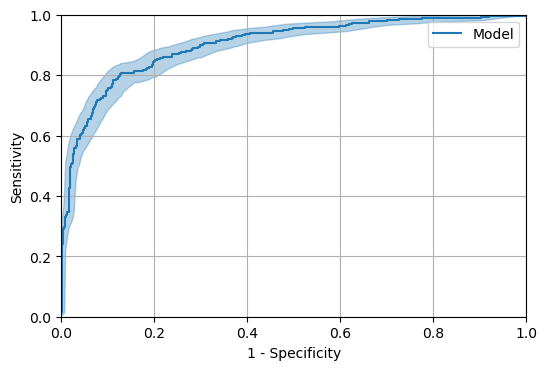

In [4]:
fig, ax, rocs = calc_patient_roc.calc_patient_rocs(
    [froc_test],
    manifest_patient_test['MRN'].values,
    legends=legends,
)

print('AUC')
for name, roc in zip(legends, rocs):
    print(name, roc['auc'], roc['auc_ci'])